### Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_loan = pd.read_csv(r"C:\Users\HasvithaSai\Desktop\IIITB\BFS\New folder\bank_marketing.csv", sep=",")
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
df_loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

In [4]:
# let's look at the first few rows of the dataframe
df_loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Looking at all the column names
df_loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response'],
      dtype='object')

In [6]:
df_loan_copy = df_loan

In [7]:
df_loan['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

In [8]:
df_loan['response'] = df_loan['response'].map({'yes': 1, 'no': 0})

In [9]:
df_loan['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [10]:
df_loan['response'].value_counts()

0    36548
1     4640
Name: response, dtype: int64

In [11]:
# Copy the dataset into a back up dataframe for future use

df_loan_copy = df_loan

In [12]:
# Determine the percentage of people who have bought the investment product, that is those who have the response varibale as 1

100*(df_loan['response'].sum()/df_loan['response'].count()).round(4)

11.27

### Exploratory Data Analysis

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

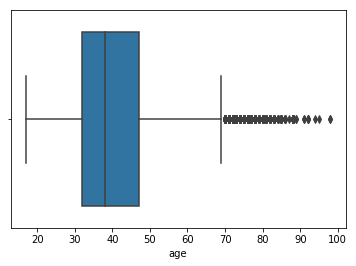

In [13]:
sns.boxplot(x='age', data=df_loan)
plt.show()

In [14]:
# Since there are a fair few data entries with age > 71, we will club all of those ages at 71 (since we can assume 
# that the behaviour will not change significantly with age at age above 70)

df_loan['age'][df_loan['age']>71] =71

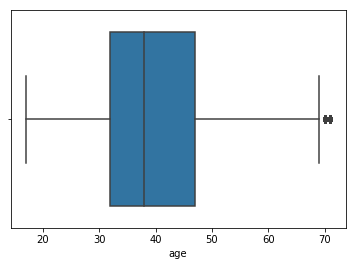

In [15]:
sns.boxplot(x='age', data=df_loan)
plt.show()

In [16]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,df_loan['age'].max() + 10, 10)
df_loan['age_bins'] = pd.cut(df_loan['age'], bins, include_lowest=True)

In [17]:
No_of_prospect = df_loan.groupby('age_bins')['response'].count().reset_index(name = 'No.of_prospect')

In [18]:
count_prospects = df_loan[df_loan['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'count_prospects')

In [19]:
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')

In [20]:
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [21]:
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7243,1067,14.7
2,"(30.0, 40.0]",16385,1597,9.7
3,"(40.0, 50.0]",10240,837,8.2
4,"(50.0, 60.0]",6270,668,10.7
5,"(60.0, 70.0]",488,212,43.4
6,"(70.0, 80.0]",422,202,47.9


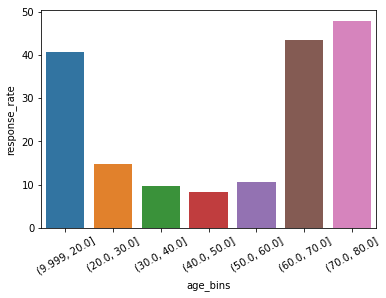

In [22]:
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

In [23]:
# Note that we have added a new column named age bucket to the table

df_loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_bins
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"


Similarly, we will look at the relation between response rate and job. Note that since job is already a categorical variable, we don't need to bucket the data

#### Job

In [24]:
df_loan['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [25]:
count_prospects_job = df_loan.groupby('job')['response'].sum().reset_index(name = 'count_prospects')

In [26]:
No_of_prospect_job = df_loan.groupby('job')['response'].count().reset_index(name = 'No_of_prospects')

In [27]:
agg_job = count_prospects_job.merge(No_of_prospect_job, on = 'job')

In [28]:
agg_job['response_rate'] = 100*(agg_job['count_prospects']/agg_job['No_of_prospects']).round(4)

In [29]:
agg_job

,job,count_prospects,No_of_prospects,response_rate
0,admin.,1352,10422,12.97
1,blue-collar,638,9254,6.89
2,entrepreneur,124,1456,8.52
3,housemaid,106,1060,10.00
4,management,328,2924,11.22
5,retired,434,1720,25.23
6,self-employed,149,1421,10.49
7,services,323,3969,8.14
8,student,275,875,31.43
9,technician,730,6743,10.83


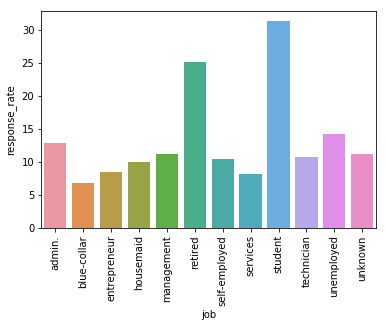

In [30]:
ax = sns.barplot(x='job', y='response_rate', data=agg_job)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### Marital

In [31]:
df_loan['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [32]:
df_loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

In [33]:
count_prospects_marital = df_loan.groupby('marital')['response'].sum().reset_index(name = 'count_prospects')

In [34]:
No_of_prospect_job = df_loan.groupby('marital')['response'].count().reset_index(name = 'No_of_prospects')

In [35]:
agg_marital = count_prospects_marital.merge(No_of_prospect_job, on = 'marital')

In [36]:
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

In [37]:
agg_marital

,marital,count_prospects,No_of_prospects,response_rate
0,divorced,476,4612,10.32
1,married,2544,25008,10.17
2,single,1620,11568,14.00


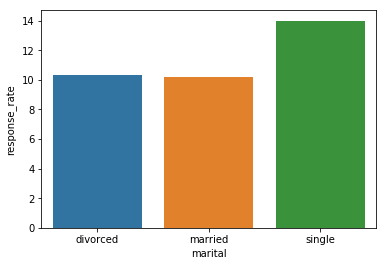

In [38]:
ax = sns.barplot(x='marital', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Education

In [39]:
df_loan['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [40]:
df_loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [41]:
df_loan['education'].value_counts()

Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

In [42]:
count_prospects_education = df_loan.groupby('education')['response'].sum().reset_index(name = 'count_prospects')

In [43]:
No_of_prospect_education = df_loan.groupby('education')['response'].count().reset_index(name = 'No_of_prospects')

In [44]:
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'education')

In [45]:
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)

In [46]:
agg_education

,education,count_prospects,No_of_prospects,response_rate
0,Primary_Education,1093,12531,8.72
1,Secondary_Education,1031,9515,10.84
2,Tertiary_Education,1670,12168,13.72
3,professional.course,595,5243,11.35
4,unknown,251,1731,14.50


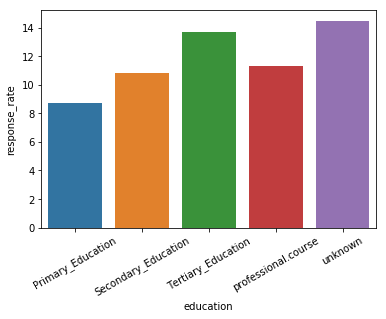

In [47]:
ax = sns.barplot(x='education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Previous Default

In [48]:
df_loan['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [49]:
count_prospects_default = df_loan.groupby('default')['response'].sum().reset_index(name = 'count_prospects')

In [50]:
No_of_prospect_default = df_loan.groupby('default')['response'].count().reset_index(name = 'No_of_prospects')

In [51]:
agg_default = count_prospects_default.merge(No_of_prospect_default, on = 'default')

In [52]:
agg_default['response_rate'] = 100*(agg_default['count_prospects']/agg_default['No_of_prospects']).round(4)

In [53]:
agg_default

,default,count_prospects,No_of_prospects,response_rate
0,no,4197,32588,12.88
1,unknown,443,8597,5.15
2,yes,0,3,0.00


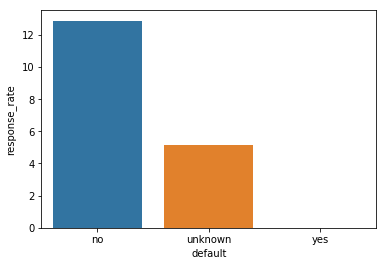

In [54]:
ax = sns.barplot(x='default', y='response_rate', data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Housing

In [55]:
df_loan['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [56]:
count_prospects_housing = df_loan.groupby('housing')['response'].sum().reset_index(name = 'count_prospects')

In [57]:
No_of_prospect_housing = df_loan.groupby('housing')['response'].count().reset_index(name = 'No_of_prospects')

In [58]:
agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'housing')

In [59]:
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(4)

In [60]:
agg_housing

,housing,count_prospects,No_of_prospects,response_rate
0,no,2026,18622,10.88
1,unknown,107,990,10.81
2,yes,2507,21576,11.62


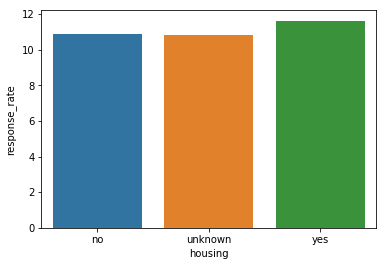

In [61]:
ax = sns.barplot(x='housing', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that there is a slight uptick in the response rate for people with housing, though it is probably not very significant

#### df_loan

In [62]:
df_loan['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [63]:
count_prospects_df_loan = df_loan.groupby('loan')['response'].sum().reset_index(name = 'count_prospects')

In [64]:
No_of_prospect_df_loan = df_loan.groupby('loan')['response'].count().reset_index(name = 'No_of_prospects')

In [65]:
agg_df_loan = count_prospects_df_loan.merge(No_of_prospect_df_loan, on = 'loan')

In [66]:
agg_df_loan['response_rate'] = 100*(agg_df_loan['count_prospects']/agg_df_loan['No_of_prospects']).round(4)

In [67]:
agg_df_loan

,loan,count_prospects,No_of_prospects,response_rate
0,no,3850,33950,11.34
1,unknown,107,990,10.81
2,yes,683,6248,10.93


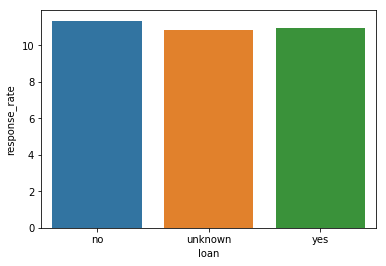

In [68]:
ax = sns.barplot(x='loan', y='response_rate', data=agg_df_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Contact

In [69]:
df_loan['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [70]:
count_prospects_contact = df_loan.groupby('contact')['response'].sum().reset_index(name = 'count_prospects')

In [71]:
No_of_prospect_contact = df_loan.groupby('contact')['response'].count().reset_index(name = 'No_of_prospects')

In [72]:
agg_contact = count_prospects_contact.merge(No_of_prospect_contact, on = 'contact')

In [73]:
agg_contact['response_rate'] = 100*(agg_contact['count_prospects']/agg_contact['No_of_prospects']).round(4)

In [74]:
agg_contact

,contact,count_prospects,No_of_prospects,response_rate
0,cellular,3853,26144,14.74
1,telephone,787,15044,5.23


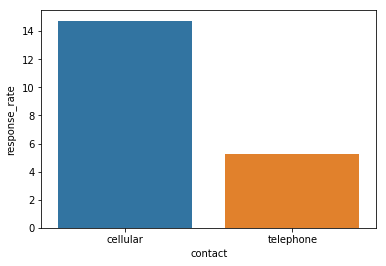

In [75]:
ax = sns.barplot(x='contact', y='response_rate', data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Month

In [76]:
df_loan['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [77]:
count_prospects_month = df_loan.groupby('month')['response'].sum().reset_index(name = 'count_prospects')

In [78]:
No_of_prospect_month = df_loan.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')

In [79]:
agg_month = count_prospects_month.merge(No_of_prospect_month, on = 'month')

In [80]:
agg_month['response_rate'] = 100*(agg_month['count_prospects']/agg_month['No_of_prospects']).round(4)

In [81]:
agg_month

,month,count_prospects,No_of_prospects,response_rate
0,apr,539,2632,20.48
1,aug,655,6178,10.60
2,dec,89,182,48.90
3,jul,649,7174,9.05
4,jun,559,5318,10.51
5,mar,276,546,50.55
6,may,886,13769,6.43
7,nov,416,4101,10.14
8,oct,315,718,43.87
9,sep,256,570,44.91


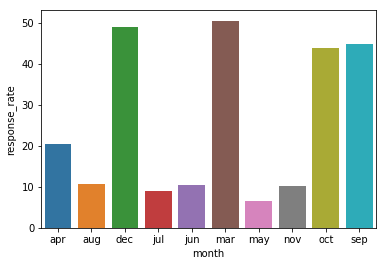

In [82]:
ax = sns.barplot(x='month', y='response_rate', data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Day of the week

In [83]:
df_loan['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [84]:
count_prospects_day = df_loan.groupby('day_of_week')['response'].sum().reset_index(name = 'count_prospects')

In [85]:
No_of_prospect_day = df_loan.groupby('day_of_week')['response'].count().reset_index(name = 'No_of_prospects')

In [86]:
agg_day = count_prospects_day.merge(No_of_prospect_day, on = 'day_of_week')

In [87]:
agg_day['response_rate'] = 100*(agg_day['count_prospects']/agg_day['No_of_prospects']).round(4)

In [88]:
agg_day

,day_of_week,count_prospects,No_of_prospects,response_rate
0,fri,846,7827,10.81
1,mon,847,8514,9.95
2,thu,1045,8623,12.12
3,tue,953,8090,11.78
4,wed,949,8134,11.67


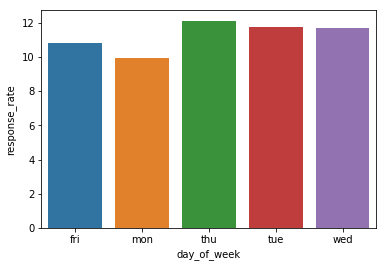

In [89]:
ax = sns.barplot(x='day_of_week', y='response_rate', data=agg_day)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can note that response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

#### Duration of the call

C:\Users\HasvithaSai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


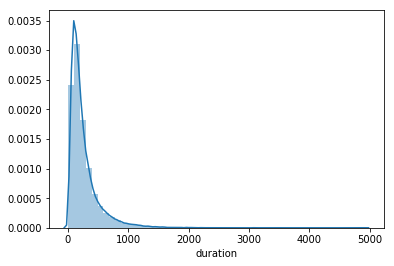

In [90]:
sns.distplot(df_loan['duration'])
plt.show()

As we know that this is a continuos variable, we will create a box plot

In [91]:
df_loan['duration'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
95%        752.650000
99%       1271.130000
max       4918.000000
Name: duration, dtype: float64

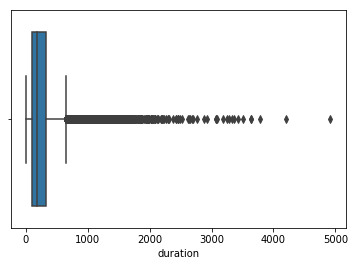

In [92]:
sns.boxplot(x='duration', data=df_loan)
plt.show()

In [93]:
df_loan['duration'][df_loan['duration']>1271] =1271

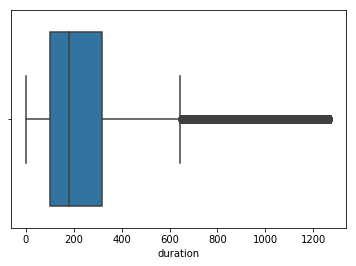

In [94]:
sns.boxplot(x='duration', data=df_loan)
plt.show()

C:\Users\HasvithaSai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


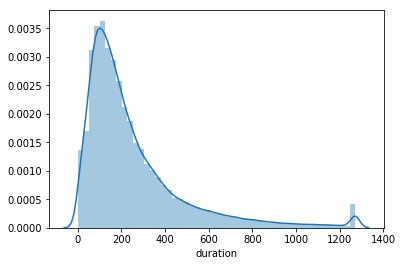

In [95]:
sns.distplot(df_loan['duration'])
plt.show()

#### Campaign

In [96]:
df_loan['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

C:\Users\HasvithaSai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


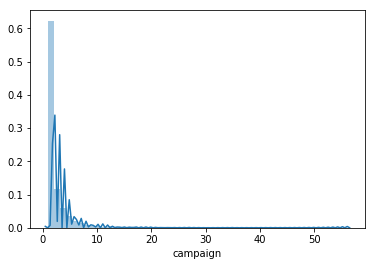

In [97]:
sns.distplot(df_loan['campaign'])
plt.show()

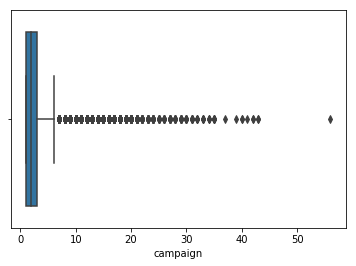

In [98]:
# We will create a box plot

sns.boxplot(x='campaign', data=df_loan)
plt.show()

In [99]:
df_loan['campaign'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

In [100]:
df_loan['campaign'][df_loan['campaign']>14] =14

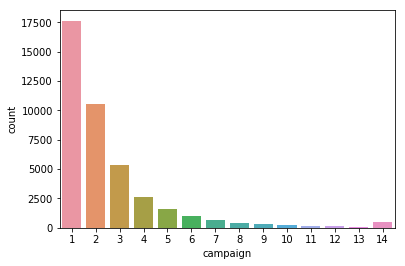

In [101]:
sns.countplot(df_loan['campaign'])
plt.show()

In [102]:
count_prospects_campaign = df_loan.groupby('campaign')['response'].sum().reset_index(name = 'count_prospects')

In [103]:
No_of_prospect_campaign = df_loan.groupby('campaign')['response'].count().reset_index(name = 'No_of_prospects')

In [104]:
agg_campaign = count_prospects_campaign.merge(No_of_prospect_campaign, on = 'campaign')

In [105]:
agg_campaign['response_rate'] = 100*(agg_campaign['count_prospects']/agg_campaign['No_of_prospects']).round(4)

In [106]:
agg_campaign

,campaign,count_prospects,No_of_prospects,response_rate
0,1,2300,17642,13.04
1,2,1211,10570,11.46
2,3,574,5341,10.75
3,4,249,2651,9.39
4,5,120,1599,7.50
5,6,75,979,7.66
6,7,38,629,6.04
7,8,17,400,4.25
8,9,17,283,6.01
9,10,12,225,5.33


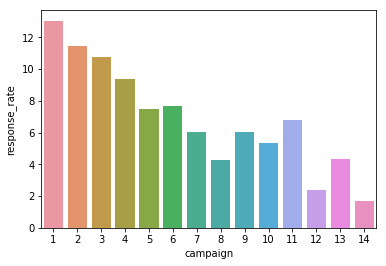

In [107]:
ax = sns.barplot(x='campaign', y='response_rate', data=agg_campaign)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Interesting to note, that the response rate gradually decreases as the number of campaign contacts increases.

#### Gap after the last contact

In [108]:
df_loan['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [109]:
df_loan['pdays'][df_loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

df_loan['pdays'][df_loan['pdays'].isin([999])]='First_time_contacted'

df_loan['pdays'][~df_loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [110]:
df_loan['pdays'].value_counts()

First_time_contacted         39673
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

In [111]:
count_prospects_pdays = df_loan.groupby('pdays')['response'].sum().reset_index(name = 'count_prospects')

In [112]:
No_of_prospect_pdays = df_loan.groupby('pdays')['response'].count().reset_index(name = 'No_of_prospects')

In [113]:
agg_pdays = count_prospects_pdays.merge(No_of_prospect_pdays, on = 'pdays')

In [114]:
agg_pdays['response_rate'] = 100*(agg_pdays['count_prospects']/agg_pdays['No_of_prospects']).round(4)

In [115]:
agg_pdays

,pdays,count_prospects,No_of_prospects,response_rate
0,Contacted_after_10days,116,204,56.86
1,Contacted_in_first_10days,851,1311,64.91
2,First_time_contacted,3673,39673,9.26


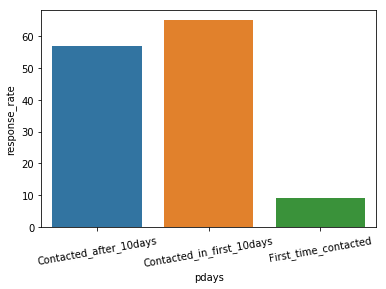

In [116]:
ax = sns.barplot(x='pdays', y='response_rate', data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.show()

#### Previous

In [117]:
df_loan['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [118]:
df_loan['previous'][df_loan['previous'].isin([0])]='Never contacted'
df_loan['previous'][df_loan['previous'].isin([1,2,3])]='Less_than_3_times'
df_loan['previous'][df_loan['previous'].isin([4,5,6,7])]='More than_3_times'

In [119]:
df_loan['previous'].value_counts()

Never contacted      35563
Less_than_3_times     5531
More than_3_times       94
Name: previous, dtype: int64

In [120]:
count_prospects_previous = df_loan.groupby('previous')['response'].sum().reset_index(name = 'count_prospects')

In [121]:
No_of_prospect_previous = df_loan.groupby('previous')['response'].count().reset_index(name = 'No_of_prospects')

In [122]:
agg_previous = count_prospects_previous.merge(No_of_prospect_previous, on = 'previous')

In [123]:
agg_previous['response_rate'] = 100*(agg_previous['count_prospects']/agg_previous['No_of_prospects']).round(4)

In [124]:
agg_previous

,previous,count_prospects,No_of_prospects,response_rate
0,Less_than_3_times,1445,5531,26.13
1,More than_3_times,54,94,57.45
2,Never contacted,3141,35563,8.83


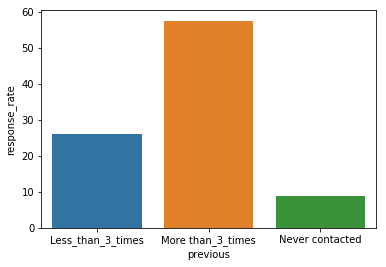

In [125]:
ax = sns.barplot(x='previous', y='response_rate', data=agg_previous)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

In [126]:
df_loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

#### Employment Variation Rate

C:\Users\HasvithaSai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


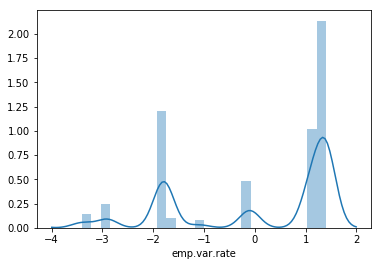

In [127]:
sns.distplot(df_loan['emp.var.rate'])
plt.show()

In [128]:
df_loan['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [129]:
df_loan['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [130]:
count_prospects_emp_var_rate = df_loan.groupby('emp.var.rate')['response'].sum().reset_index(name = 'count_prospects')

In [131]:
No_of_prospect_emp_var_rate = df_loan.groupby('emp.var.rate')['response'].count().reset_index(name = 'No_of_prospects')

In [132]:
agg_emp_var_rate = count_prospects_emp_var_rate.merge(No_of_prospect_emp_var_rate, on = 'emp.var.rate')

In [133]:
agg_emp_var_rate['response_rate'] = 100*(agg_emp_var_rate['count_prospects']/agg_emp_var_rate['No_of_prospects']).round(4)

In [134]:
agg_emp_var_rate

,emp.var.rate,count_prospects,No_of_prospects,response_rate
0,-3.4,454,1071,42.39
1,-3.0,88,172,51.16
2,-2.9,594,1663,35.72
3,-1.8,1461,9184,15.91
4,-1.7,403,773,52.13
5,-1.1,301,635,47.40
6,-0.2,1,10,10.00
7,-0.1,232,3683,6.30
8,1.1,240,7763,3.09
9,1.4,866,16234,5.33


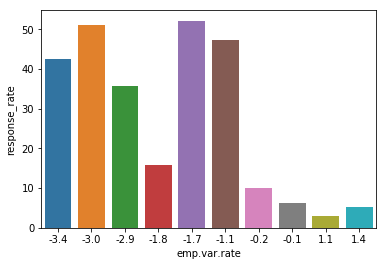

In [135]:
ax = sns.barplot(x='emp.var.rate', y='response_rate', data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Consumer Price Index

C:\Users\HasvithaSai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


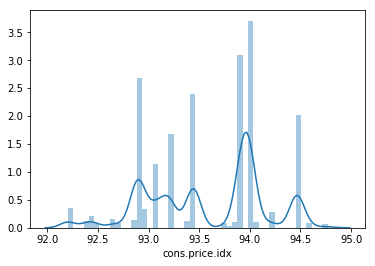

In [136]:
sns.distplot(df_loan['cons.price.idx'])
plt.show()

In [137]:
df_loan['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

In [138]:
df_loan['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

#### Euribor three month rate

C:\Users\HasvithaSai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


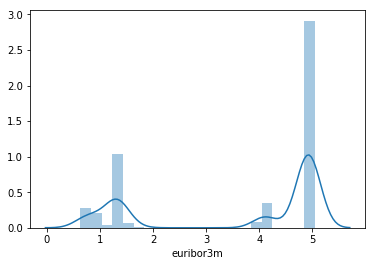

In [139]:
sns.distplot(df_loan['euribor3m'])
plt.show()

In [140]:
df_loan['euribor3m'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

#### Number of employeees

C:\Users\HasvithaSai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


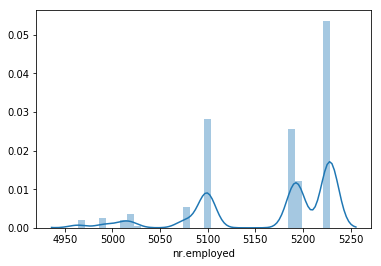

In [141]:
sns.distplot(df_loan['nr.employed'])
plt.show()

In [142]:
df_loan['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [143]:
df_loan['nr.employed'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
95%       5228.100000
99%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

#### Data Preparation

Once Exploratory Data anlysis has been performed, we move to data preparation for the purpose of modelling.

In [144]:
# inspect the columns

df_loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

In [145]:
# Droping the column age_bins we had created for the purpose of data visualisation

df_loan.drop(columns = 'age_bins', inplace = True)

In [146]:
# Creating a dummy variable for the variable 'job' and dropping the first one.

job = pd.get_dummies(df_loan['job'],prefix='job',drop_first=True)

#Adding the results to the master dataframe

df_loan = pd.concat([df_loan,job],axis=1)

In [147]:
df_loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


In [148]:
# Creating dummy variable for marital column

marital = pd.get_dummies(df_loan['marital'],prefix='marital',drop_first=True)
df_loan = pd.concat([df_loan,marital],axis=1)

In [149]:
# Creating dummy variable for education column

education = pd.get_dummies(df_loan['education'],prefix='education',drop_first=True)
df_loan = pd.concat([df_loan,education],axis=1)

In [150]:
# Creating dummy variable for default column

default = pd.get_dummies(df_loan['default'],prefix='default',drop_first=True)
df_loan = pd.concat([df_loan,default],axis=1)

In [151]:
# Creating dummy variable for housing column

housing = pd.get_dummies(df_loan['housing'],prefix='housing',drop_first=True)
df_loan = pd.concat([df_loan,housing],axis=1)

In [152]:
# Creating dummy variable for df_loan column

df_loan_v= pd.get_dummies(df_loan['loan'],prefix='loan',drop_first=True)
df_loan = pd.concat([df_loan,df_loan_v],axis=1)

In [153]:
# Creating dummy variable for contact column

contact = pd.get_dummies(df_loan['contact'],prefix='contact',drop_first=True)
df_loan = pd.concat([df_loan,contact],axis=1)

In [154]:
# Creating dummy variable for month column

month = pd.get_dummies(df_loan['month'],prefix='month',drop_first=True)
df_loan = pd.concat([df_loan,month],axis=1)

In [155]:
# Creating dummy variable for day_of_week column

day_of_week = pd.get_dummies(df_loan['day_of_week'],prefix='day_of_week',drop_first=True)
df_loan = pd.concat([df_loan,day_of_week],axis=1)

In [156]:
# Creating dummy variable for pdays column

pdays = pd.get_dummies(df_loan['pdays'],prefix='pdays',drop_first=True)
df_loan = pd.concat([df_loan,pdays],axis=1)

In [157]:
# Creating dummy variable for previous column

previous = pd.get_dummies(df_loan['previous'],prefix='previous',drop_first=True)
df_loan = pd.concat([df_loan,previous],axis=1)

In [158]:
# Creating dummy variable for poutcome column

poutcome = pd.get_dummies(df_loan['poutcome'],prefix='poutcome',drop_first=True)
df_loan = pd.concat([df_loan,poutcome],axis=1)

In [159]:
# inspect the dataframe

df_loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0


In [160]:
# Drop all features for whom dummy variable has been created

df_loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

In [161]:
df_loan.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [162]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [163]:
# Putting feature variable to X
X = df_loan.drop(['response'],axis=1)

# Putting response variable to y
y = df_loan['response']

In [164]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [165]:
X_train.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
7019,31,102,4,1.1,93.994,-36.4,4.860,5191.0,0,0,...,0,1,0,0,0,1,0,1,1,0
27175,51,218,3,-0.1,93.200,-42.0,4.021,5195.8,0,0,...,0,0,0,0,0,1,0,1,1,0
15817,39,333,3,1.4,93.918,-42.7,4.960,5228.1,0,0,...,1,0,0,0,0,1,0,1,1,0
40971,68,130,4,-1.1,94.601,-49.5,1.000,4963.6,0,0,...,1,0,0,0,0,1,0,0,0,0
8467,37,267,3,1.4,94.465,-41.8,4.864,5228.1,0,0,...,0,0,1,0,0,1,0,1,1,0


In [166]:
# Standardisation continuous features for X_train
X_train_df_loan = X_train[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [167]:
std_X_train_df_loan=(X_train_df_loan-X_train_df_loan.mean())/X_train_df_loan.std()

In [168]:
X_train = X_train.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [169]:
X_train = pd.concat([X_train,std_X_train_df_loan],axis=1)

In [170]:
X_train.head()

,duration,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,102,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618
27175,218,0,0,0,0,0,0,0,0,1,...,1,1,0,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,333,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,130,0,0,0,0,1,0,0,0,0,...,0,0,0,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,267,0,0,0,0,0,0,0,0,1,...,1,1,0,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088


In [171]:
# Standardisation continuous features for X_test
X_test_df_loan = X_test[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [172]:
std_X_test_df_loan=(X_test_df_loan-X_test_df_loan.mean())/X_test_df_loan.std()

In [173]:
X_test = X_test.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [174]:
X_test = pd.concat([X_test,std_X_test_df_loan],axis=1)

In [175]:
X_test.head()

,duration,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33148,52,0,0,0,0,0,0,0,0,0,...,1,1,0,-1.182984,-0.651460,-1.199007,-1.172918,-1.237193,-1.348603,-0.944859
27585,407,0,0,0,0,0,0,0,0,1,...,1,1,0,0.100062,0.663413,-0.118526,-0.644728,-0.332420,0.226981,0.393573
15722,177,1,0,0,0,0,0,0,0,0,...,1,1,0,-0.590809,-0.651460,0.834840,0.590583,-0.483215,0.768913,0.840640
40349,187,0,0,0,0,0,0,0,0,0,...,0,0,1,-1.182984,-0.213169,-1.135450,0.778116,0.464642,-1.574841,-2.432774
2576,165,0,0,0,0,0,0,1,0,0,...,1,1,0,1.481803,-0.213169,0.644167,0.721340,0.873944,0.708890,0.327136


In [176]:
import statsmodels.api as sm

In [177]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [178]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28781
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5781.4
Date:                Mon, 22 Jul 2019   Deviance:                       11563.
Time:                        23:33:32   Pearson chi2:                 1.92e+04
No. Iterations:                    19   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -4.1086      0.325    -12.649      0.000      -4.745      -3.472
duration                            0.0052   9.24e-05     56.372      0.000       0.005       0.005
job_blue-collar                    -0.2235      0.097     -2.307      0.021      -0.413      -0.034
job_entrepreneur                   -0.4475      0.158     -2.831      0.005      -0.757      -0.138
job_housemaid                       0.1248      0.172      0.724      0.469      -0.213       0.463
job_management                     -0.1615      0.106     -1.520      0.128      -0.370       0.047
job_retired                         0.3529      0.126      2.798      0.005       0.106       0.600
job_self-employed                  -0.1326      0.142     -0.934      0.350      -0.411       0.145
job_services                       -0.0504      0.102     -0.492      0.622      -0.251       0.150
job_student                         0.2960      0.135      2.199      0.028       0.032       0.560
job_technician                     -0.0577      0.087     -0.663      0.507      -0.228       0.113
job_unemployed                      0.0030      0.155      0.019      0.984      -0.300       0.306
job_unknown                         0.0143      0.269      0.053      0.958      -0.513       0.542
marital_married                     0.0008      0.083      0.010      0.992      -0.162       0.164
marital_single                      0.0641      0.095      0.673      0.501      -0.123       0.251
education_Secondary_Education       0.0422      0.084      0.504      0.614      -0.122       0.206
education_Tertiary_Education        0.1922      0.085      2.260      0.024       0.025       0.359
education_professional.course       0.1573      0.100      1.578      0.115      -0.038       0.353
education_unknown                   0.2425      0.124      1.950      0.051      -0.001       0.486
default_unknown                    -0.3520      0.082     -4.280      0.000      -0.513      -0.191
default_yes                       -16.1403   1.25e+04     -0.001      0.999   -2.45e+04    2.45e+04
housing_unknown                    -0.0439      0.086     -0.513      0.608      -0.211       0.124
housing_yes                         0.0226      0.050      0.449      0.653      -0.076       0.121
loan_unknown                       -0.0439      0.086     -0.513      0.608      -0.211       0.124
loan_yes                           -0.0083      0.069     -0.120      0.904      -0.144       0.127
contact_telephone                  -0.5065      0.091     -5.560      0.000      -0.685      -0.328
month_aug                           0.8928      0.145      6.158      0.000       0.609       1.177
month_dec                           0.1816      0.251      0.723      0.470      -0.311       0.674
month_jul                           0.0764      0.117      0.6

In [180]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)   

[False False False False False False  True False False False False False
  True False False  True False False False False False False False False
 False  True False False False False False False False  True  True False
  True  True False False  True  True False False False False  True False
 False  True  True]
[38 34 16 18 21 19  1 26  2  9 36 37  1 32  4  1 25 33 35 15 14 24 11 22
 10  1 39 27 23 31 20  6 17  1  1  5  1  1  7 29  1  1 13 12  8  3  1 28
 30  1  1]


In [181]:
# Checking for variables obtained with rfe then variables removed with rfe 
rfe_column = X_train.columns[rfe.support_]
rfe_column

Index(['job_self-employed', 'marital_married', 'education_Tertiary_Education',
       'month_aug', 'month_sep', 'day_of_week_mon', 'day_of_week_tue',
       'day_of_week_wed', 'previous_More than_3_times',
       'previous_Never contacted', 'emp.var.rate', 'euribor3m', 'nr.employed'],
      dtype='object')

In [182]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_column]

In [183]:
# Model with select variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train_rfe, y_train)
#logsk.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
#Comparing the model with StatsModels
#logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
modres = logm1.fit()
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28817
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8453.3
Date:                Mon, 22 Jul 2019   Deviance:                       16907.
Time:                        23:34:15   Pearson chi2:                 3.09e+04
No. Iterations:                     6   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.3525      0.064    -36.950      0.000      -2.477      -2.228
job_self-employed               -0.0447      0.114     -0.392      0.695      -0.268       0.179
marital_married                 -0.1052      0.041     -2.551      0.011      -0.186      -0.024
education_Tertiary_Education     0.1612      0.044      3.688      0.000       0.076       0.247
month_aug                        0.4258      0.061      6.994      0.000       0.306       0.545
month_sep                       -0.1849      0.114     -1.619      0.105      -0.409       0.039
day_of_week_mon                 -0.2534      0.057     -4.448      0.000      -0.365      -0.142
day_of_week_tue                  0.0185      0.055      0.335      0.738      -0.090       0.127
day_of_week_wed                  0.0835      0.055      1.524      0.128      -0.024       0.191
previous_More than_3_times       0.3256      0.263      1.236      0.216      -0.191       0.842
previous_Never contacted        -0.1340      0.051     -2.629      0.009      -0.234      -0.034
emp.var.rate                    -0.6589      0.065    -10.070      0.000      -0.787      -0.531
euribor3m                        0.9113      0.095      9.589      0.000       0.725       1.098
nr.employed                     -1.2256      0.052    -23.453      0.000      -1.328      -1.123
================================================================================================
"""

In [185]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,euribor3m,32.48
10,emp.var.rate,19.23
12,nr.employed,11.32
9,previous_Never contacted,3.55
1,marital_married,2.27
2,education_Tertiary_Education,1.44
5,day_of_week_mon,1.43
6,day_of_week_tue,1.40
7,day_of_week_wed,1.40
3,month_aug,1.27


In [186]:
# Removing the column
X_train_rfe=X_train_rfe.drop(columns='euribor3m')

In [187]:
# Re-Run model with new x dataframe
logm2 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
modres = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28818
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8499.4
Date:                Mon, 22 Jul 2019   Deviance:                       16999.
Time:                        23:34:18   Pearson chi2:                 3.10e+04
No. Iterations:                     6   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.4266      0.063    -38.578      0.000      -2.550      -2.303
job_self-employed               -0.0314      0.113     -0.277      0.781      -0.254       0.191
marital_married                 -0.0846      0.041     -2.068      0.039      -0.165      -0.004
education_Tertiary_Education     0.1917      0.043      4.425      0.000       0.107       0.277
month_aug                        0.4233      0.061      6.988      0.000       0.305       0.542
month_sep                        0.0283      0.113      0.250      0.802      -0.193       0.249
day_of_week_mon                 -0.2415      0.057     -4.272      0.000      -0.352      -0.131
day_of_week_tue                  0.0664      0.055      1.213      0.225      -0.041       0.174
day_of_week_wed                  0.1098      0.054      2.017      0.044       0.003       0.216
previous_More than_3_times       0.3265      0.263      1.242      0.214      -0.189       0.842
previous_Never contacted        -0.1079      0.050     -2.158      0.031      -0.206      -0.010
emp.var.rate                    -0.1288      0.036     -3.578      0.000      -0.199      -0.058
nr.employed                     -0.8627      0.036    -24.238      0.000      -0.932      -0.793
================================================================================================
"""

In [188]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,nr.employed,6.59
10,emp.var.rate,6.09
9,previous_Never contacted,3.54
1,marital_married,2.27
2,education_Tertiary_Education,1.44
5,day_of_week_mon,1.43
6,day_of_week_tue,1.40
7,day_of_week_wed,1.40
3,month_aug,1.24
4,month_sep,1.17


In [189]:
# Removing the column
X_train_rfe=X_train_rfe.drop(columns='nr.employed')

In [190]:
# Re-Run model with new x dataframe
logm2 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
modres = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28819
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8782.7
Date:                Mon, 22 Jul 2019   Deviance:                       17565.
Time:                        23:34:21   Pearson chi2:                 2.95e+04
No. Iterations:                     6   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.1370      0.059    -35.960      0.000      -2.253      -2.020
job_self-employed               -0.0901      0.112     -0.803      0.422      -0.310       0.130
marital_married                 -0.1292      0.040     -3.220      0.001      -0.208      -0.051
education_Tertiary_Education     0.2009      0.042      4.731      0.000       0.118       0.284
month_aug                        0.3141      0.059      5.286      0.000       0.198       0.431
month_sep                        0.9534      0.110      8.645      0.000       0.737       1.170
day_of_week_mon                 -0.2080      0.056     -3.748      0.000      -0.317      -0.099
day_of_week_tue                  0.0696      0.054      1.290      0.197      -0.036       0.175
day_of_week_wed                  0.1038      0.053      1.941      0.052      -0.001       0.209
previous_More than_3_times       1.3681      0.261      5.233      0.000       0.856       1.881
previous_Never contacted        -0.3524      0.048     -7.394      0.000      -0.446      -0.259
emp.var.rate                    -0.8308      0.021    -39.280      0.000      -0.872      -0.789
================================================================================================
"""

In [191]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,previous_Never contacted,3.52
1,marital_married,2.27
2,education_Tertiary_Education,1.44
5,day_of_week_mon,1.43
7,day_of_week_wed,1.40
6,day_of_week_tue,1.39
3,month_aug,1.24
10,emp.var.rate,1.15
0,job_self-employed,1.05
4,month_sep,1.05


In [192]:
# Getting the predicted values on the train set
y_train_pred = modres.predict(sm.add_constant(X_train_rfe))

In [193]:
# New dataframe for y train prediction
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
7019,0,0.049387
27175,0,0.083616
15817,0,0.039353
40971,0,0.151792
8467,0,0.037415


In [194]:
# Creating new column 'predicted' with 1 if Conversion_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
7019,0,0.049387,0
27175,0,0.083616,0
15817,0,0.039353,0
40971,0,0.151792,0
8467,0,0.037415,0


In [195]:
y_train_pred_final['Prospect_id'] = y_train_pred_final.index

In [196]:
y_train_pred_final['cost_of_Call'] = df_loan_copy['duration']/60*df_loan['campaign']
y_train_pred_final['duration'] = df_loan_copy['duration']



In [197]:
y_train_pred_final = y_train_pred_final.sort_values(by="Converted_Prob" , ascending=False)

In [198]:
# Build a logistic regression model without using the variable 'duration'
y_train_pred_final

,Converted,Converted_Prob,predicted,Prospect_id,cost_of_Call,duration
38776,1,0.758493,1,38776,2.100000,126
37747,0,0.754383,1,37747,3.333333,200
37338,1,0.743176,1,37338,2.783333,167
40679,1,0.732992,1,40679,3.483333,209
40816,1,0.732992,1,40816,5.766667,173
40818,0,0.732992,1,40818,11.633333,349
40732,1,0.727993,1,40732,5.516667,331
38029,0,0.723644,1,38029,10.233333,307
38089,1,0.723644,1,38089,2.550000,153
38153,0,0.723644,1,38153,5.233333,314


In [199]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8865110471367625


In [200]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted )
confusion

array([[25443,   130],
       [ 3142,   116]], dtype=int64)

In [201]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,Prospect_id,cost_of_Call,duration,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
38776,1,0.758493,1,38776,2.100000,126,1,1,1,1,1,1,1,1,0,0
37747,0,0.754383,1,37747,3.333333,200,1,1,1,1,1,1,1,1,0,0
37338,1,0.743176,1,37338,2.783333,167,1,1,1,1,1,1,1,1,0,0
40679,1,0.732992,1,40679,3.483333,209,1,1,1,1,1,1,1,1,0,0
40816,1,0.732992,1,40816,5.766667,173,1,1,1,1,1,1,1,1,0,0


In [202]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df_loan = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','preci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci=cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cutoff_df_loan.loc[i] =[ i ,accuracy,sensi,speci,preci]
print(cutoff_df_loan)

     prob  accuracy     sensi     speci     preci
0.0   0.0  0.113003  1.000000  0.000000  0.113003
0.1   0.1  0.698276  0.728975  0.694365  0.233049
0.2   0.2  0.820610  0.492634  0.862394  0.313232
0.3   0.3  0.877875  0.262431  0.956282  0.433350
0.4   0.4  0.885089  0.108963  0.983967  0.464052
0.5   0.5  0.886511  0.035605  0.994917  0.471545
0.6   0.6  0.887239  0.019951  0.997732  0.528455
0.7   0.7  0.886997  0.002762  0.999648  0.500000
0.8   0.8  0.886997  0.000000  1.000000       NaN
0.9   0.9  0.886997  0.000000  1.000000       NaN


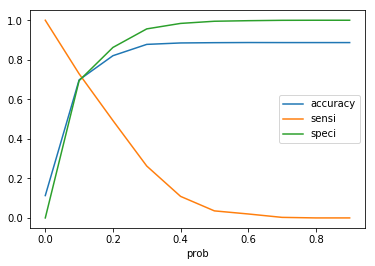

In [203]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
import matplotlib.pyplot as plt
cutoff_df_loan.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [204]:
# From the given the graph optimal cut off is given as "0.1" which is quite less

In [205]:
y_train_pred_final['Pospect_ID'] = y_train_pred_final.index

In [206]:
# taking 0.5 as the optimal value from cut off

y_train_pred_final_version = y_train_pred_final[["Converted",
"Converted_Prob",
"predicted" , "Pospect_ID","duration", "cost_of_Call"
]]

In [207]:
y_train_pred_final_version.head()

,Converted,Converted_Prob,predicted,Pospect_ID,duration,cost_of_Call
38776,1,0.758493,1,38776,126,2.100000
37747,0,0.754383,1,37747,200,3.333333
37338,1,0.743176,1,37338,167,2.783333
40679,1,0.732992,1,40679,209,3.483333
40816,1,0.732992,1,40816,173,5.766667


In [208]:
# Find the number of top X% prospects you should target to meet the business objective
# for now lets assume X =80%

y_train_pred_final_version['decile'] = pd.qcut(y_train_pred_final_version['Converted_Prob'], 10, labels=np.arange(10, 0, -1))


In [209]:
lift_df_loan = y_train_pred_final_version.groupby('decile')['Converted_Prob'].count().reset_index()


In [210]:
lift_df_loan_duration = y_train_pred_final_version.groupby('decile')['duration'].mean().reset_index()

In [211]:
lift_df_loan_cost = y_train_pred_final_version.groupby('decile')['cost_of_Call'].sum().reset_index()

In [212]:
lift_df_loan = lift_df_loan.merge(lift_df_loan_duration, on="decile")

In [213]:
#Create a data frame with the variables prospect ID, actual response, predicted response, predicted probability of response, duration of the call in seconds and cost of the call

# While creating the data frame, list the cost of call for each prospect in a new column

lift_df_loan.head()

,decile,Converted_Prob,duration
0,10,3582,248.936069
1,9,2187,252.015546
2,8,2896,256.420235
3,7,2906,265.089814
4,6,2893,250.407881


In [214]:
lift_df_loan = lift_df_loan.merge(lift_df_loan_cost, on="decile")

In [215]:
lift_df_loan.head()

,decile,Converted_Prob,duration,cost_of_Call
0,10,3582,248.936069,40618.400000
1,9,2187,252.015546,27132.300000
2,8,2896,256.420235,33922.650000
3,7,2906,265.089814,30949.816667
4,6,2893,250.407881,30597.783333


In [216]:
lift_df_loan.rename({'converted_Prob':'total'}, axis=1, inplace=True)

In [217]:
lift_df_loan_pred = y_train_pred_final_version[y_train_pred_final_version['Converted']==1].groupby('decile')['Converted'].count().reset_index()

In [218]:
lift_df_loan_pred

,decile,Converted
0,10,171
1,9,100
2,8,120
3,7,125
4,6,136
5,5,148
6,4,256
7,3,489
8,2,607
9,1,1106


In [219]:
lift_df_loan_final = lift_df_loan.merge(lift_df_loan_pred,on = 'decile')

In [220]:
lift_df_loan_final

,decile,Converted_Prob,duration,cost_of_Call,Converted
0,10,3582,248.936069,40618.400000,171
1,9,2187,252.015546,27132.300000,100
2,8,2896,256.420235,33922.650000,120
3,7,2906,265.089814,30949.816667,125
4,6,2893,250.407881,30597.783333,136
5,5,2938,232.534037,26922.700000,148
6,4,2858,240.091323,22494.616667,256
7,3,2900,267.999655,26913.066667,489
8,2,2843,271.180091,24848.183333,607
9,1,2828,268.623055,23201.466667,1106


In [221]:
lift_df_loan_final = lift_df_loan_final.sort_values(['decile'], ascending=False)
lift_df_loan_final['cumresp'] = lift_df_loan_final['Converted'].cumsum()
lift_df_loan_final['gain'] = 100*(lift_df_loan_final['cumresp']/sum(lift_df_loan_final['Converted']))
lift_df_loan_final['cumlift'] = lift_df_loan_final['gain']/(lift_df_loan_final['decile'].astype('int')*(100/10))

In [222]:
lift_df_loan_final

,decile,Converted_Prob,duration,cost_of_Call,Converted,cumresp,gain,cumlift
9,1,2828,268.623055,23201.466667,1106,1106,33.947207,3.394721
8,2,2843,271.180091,24848.183333,607,1713,52.578269,2.628913
7,3,2900,267.999655,26913.066667,489,2202,67.587477,2.252916
6,4,2858,240.091323,22494.616667,256,2458,75.445058,1.886126
5,5,2938,232.534037,26922.700000,148,2606,79.987723,1.599754
4,6,2893,250.407881,30597.783333,136,2742,84.162063,1.402701
3,7,2906,265.089814,30949.816667,125,2867,87.998772,1.257125
2,8,2896,256.420235,33922.650000,120,2987,91.682014,1.146025
1,9,2187,252.015546,27132.300000,100,3087,94.751381,1.052793
0,10,3582,248.936069,40618.400000,171,3258,100.000000,1.000000


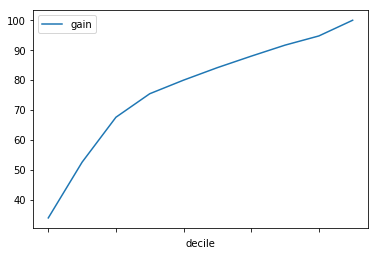

In [223]:
lift_df_loan_final.plot.line(x='decile', y=['gain'])

In [224]:
# Thus by targetting top x=3 ie decile =6  we can get 80% response based on above graph
#Find the number of top X% prospects you should target to meet the business objective
# Report the average call duration for targeting the top X% prospects to the CMO
# 
lift_df_loan_final[lift_df_loan_final['decile'] > 6]['duration'].mean()

256.08563223013664

In [225]:
# Determine the cost of acquisition
# Consider cost = 1*number of contacts made in the current campaign; determine the cost incurred for acquiring 80% of customers using the predictive model
lift_df_loan_final[lift_df_loan_final['decile'] > 6]['cost_of_Call'].sum()

124380.03333333346

In [226]:
df_loan.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [227]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [228]:
pca = PCA()
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [229]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      99.98
1      99.99
2      99.99
3      99.99
4      99.99
5      99.99
6      99.99
7      99.99
8      99.99
9     100.00
10    100.00
11    100.00
12    100.00
13    100.00
14    100.00
15    100.00
16    100.00
17    100.00
18    100.00
19    100.00
20    100.00
21    100.00
22    100.00
23    100.00
24    100.00
25    100.00
26    100.00
27    100.00
28    100.00
29    100.00
30    100.00
31    100.00
32    100.00
33    100.00
34    100.00
35    100.00
36    100.00
37    100.00
38    100.00
39    100.00
40    100.00
41    100.00
42    100.00
43    100.00
44    100.00
45    100.00
46    100.00
47    100.00
48    100.00
49    100.00
50    100.00
dtype: float64


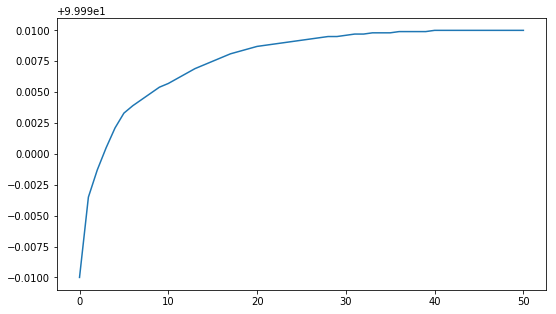

In [230]:
import matplotlib.pyplot as plt

features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [231]:
PCA_VARS = 16
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [232]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8516527349034025

In [233]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[9313 1662]
 [ 167 1215]]
Sensitivity: 	0.88
Specificity: 	0.85
AUC:    	 0.93


In [234]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.886997
1    0.113003
Name: response, dtype: float64

In [235]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [16,17,18,19,20], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [236]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [237]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10975
           1       0.63      0.46      0.53      1382

    accuracy                           0.91     12357
   macro avg       0.78      0.71      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [238]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred_default))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

[[10607   368]
 [  745   637]]
Sensitivity: 	0.88
Specificity: 	0.85


In [239]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   32.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [240]:

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.342897,0.023348,0.014625,0.001196,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.912433,0.915554,0.910525,0.911188,0.913270,0.912594,0.001761,9
1,0.314854,0.003224,0.014254,0.000380,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.912433,0.915554,0.910525,0.911188,0.913270,0.912594,0.001761,9
2,0.320861,0.015897,0.013840,0.000382,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.913300,0.914687,0.912433,0.912576,0.913270,0.913253,0.000799,5
3,0.339894,0.037495,0.015627,0.002421,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.913300,0.914687,0.912433,0.912576,0.913270,0.913253,0.000799,5
4,0.463016,0.046469,0.014614,0.000490,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.910179,0.914687,0.911566,0.911188,0.915004,0.912525,0.001951,11
5,0.449605,0.006801,0.015029,0.000634,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.910179,0.914687,0.911566,0.911188,0.915004,0.912525,0.001951,11
6,0.420571,0.010438,0.014822,0.000371,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.911913,0.913820,0.913647,0.910668,0.914831,0.912976,0.001487,7
7,0.427971,0.006638,0.015215,0.000401,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.911913,0.913820,0.913647,0.910668,0.914831,0.912976,0.001487,7
8,0.313868,0.013246,0.013828,0.000408,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.914340,0.916074,0.913647,0.911188,0.913270,0.913704,0.001584,1
9,0.307276,0.004386,0.013814,0.000400,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.914340,0.916074,0.913647,0.911188,0.913270,0.913704,0.001584,1


In [241]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9137039991675627
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [242]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [243]:
clf_gini.score(X_test,y_test)

0.911952739338027

In [244]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

C:\Users\HasvithaSai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [245]:
# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

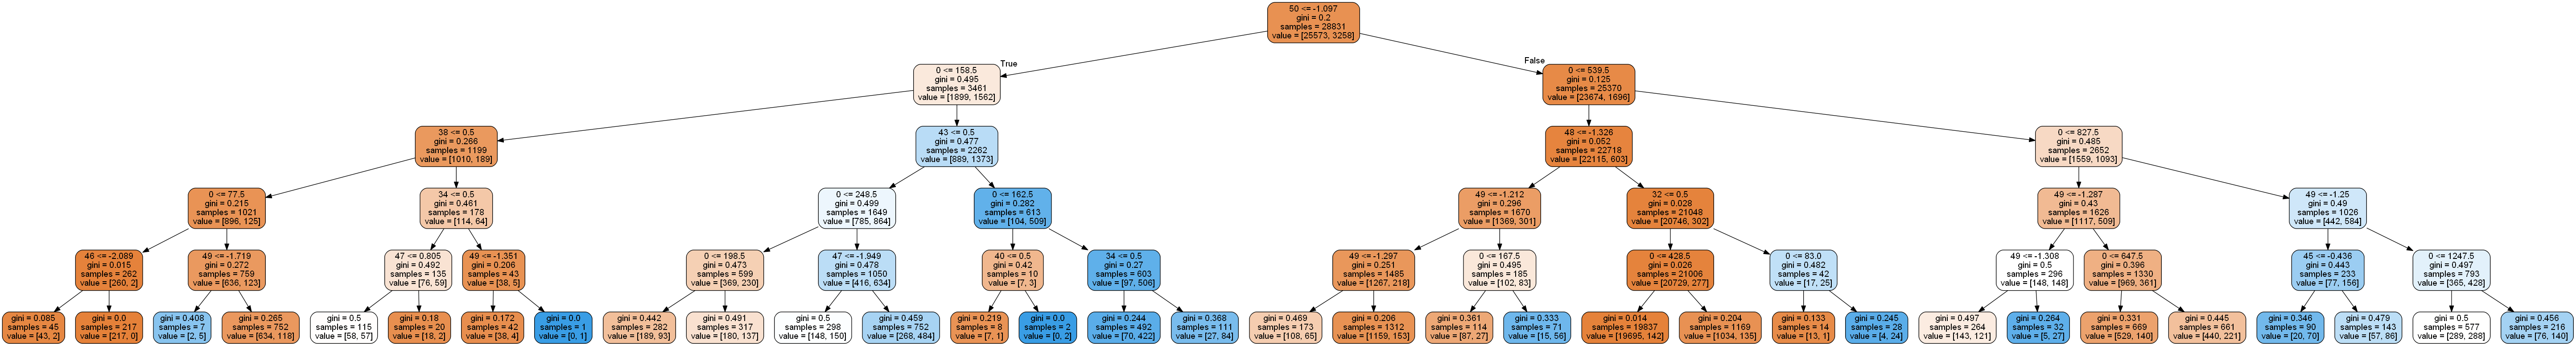

In [246]:
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [247]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.9060451565914057


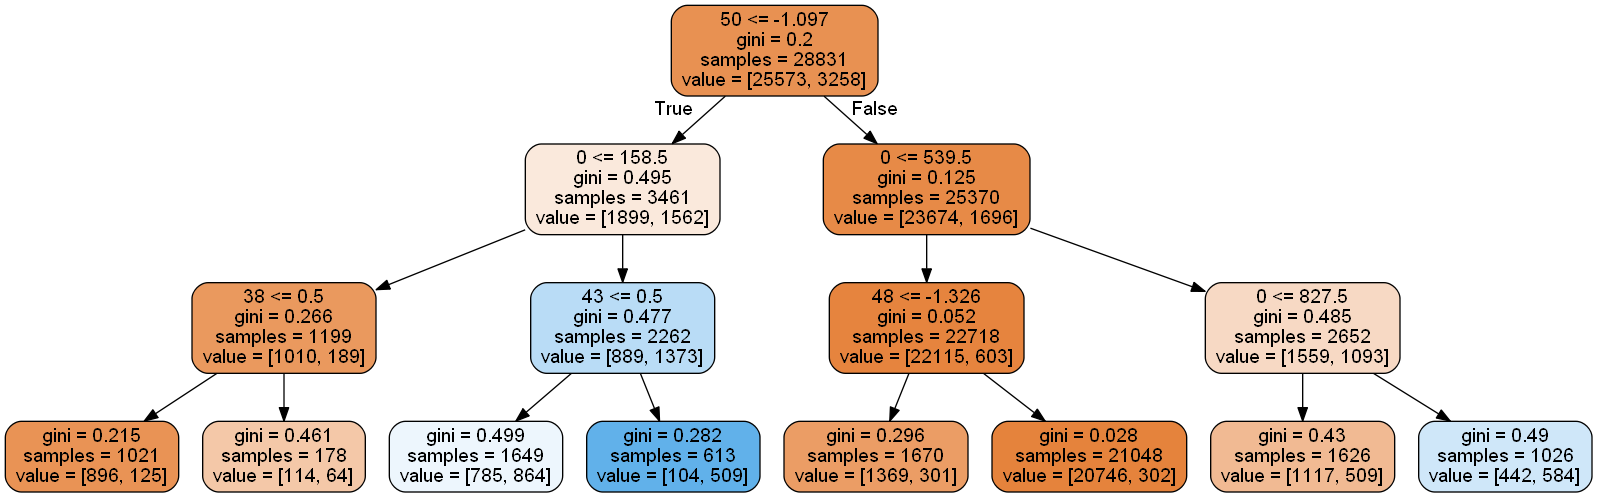

In [248]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [249]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10975
           1       0.58      0.59      0.58      1382

    accuracy                           0.91     12357
   macro avg       0.76      0.77      0.77     12357
weighted avg       0.91      0.91      0.91     12357



In [250]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[10378   597]
 [  564   818]]


In [251]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.59
Specificity: 	0.95


In [252]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [253]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [254]:
# fit model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [255]:
# predict churn on test data
y_pred = rfc.predict(X_test)

In [256]:
# Let's check the report of our default model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10975
           1       0.63      0.43      0.51      1382

    accuracy                           0.91     12357
   macro avg       0.78      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [257]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[10622   353]
 [  787   595]]


In [258]:
print(accuracy_score(y_test,y_pred))

0.9077445982034474


In [259]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [260]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  7.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [261]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9047206132288163 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [262]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

In [263]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [264]:
# predict
predictions = rfc.predict(X_test)

In [265]:
print(confusion_matrix(y_test,predictions))

[[10825   150]
 [  999   383]]


In [266]:
pred_prob = pd.DataFrame(pd.Series(y_pred_prob), columns = ['pred_prob'])

In [267]:
decile_df_loan = pd.concat([pd.DataFrame(y_test).reset_index(), pred_prob], ignore_index=True,axis=1)

In [268]:
decile_df_loan.drop(0, inplace=True, axis = 1)

In [269]:
decile_df_loan.rename({1:'actual', 2:'pred_prob'}, axis=1, inplace=True)

In [270]:
decile_df_loan['predicted'] = decile_df_loan.pred_prob.map( lambda x: 1 if x > 0.5 else 0)

In [271]:
decile_df_loan

,actual,pred_prob,predicted
0,0,0.113442,0
1,0,0.385749,0
2,0,0.045049,0
3,1,0.899558,1
4,0,0.024137,0
5,1,0.929770,1
6,0,0.056660,0
7,0,0.013133,0
8,0,0.104840,0
9,0,0.040504,0


In [272]:
decile_df_loan['decile'] = pd.qcut(decile_df_loan['pred_prob'], 10, labels=np.arange(10, 0, -1))

In [273]:
lift_df_loan = decile_df_loan.groupby('decile')['pred_prob'].count().reset_index()

In [274]:
lift_df_loan.rename({'pred_prob':'total'}, axis=1, inplace=True)

In [275]:
lift_df_loan_pred = decile_df_loan[decile_df_loan['actual']==1].groupby('decile')['actual'].count().reset_index()

In [276]:
lift_df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
decile    10 non-null category
total     10 non-null int64
dtypes: category(1), int64(1)
memory usage: 570.0 bytes


In [277]:
lift_df_loan_final = lift_df_loan.merge(lift_df_loan_pred,on = 'decile')

In [278]:
lift_df_loan_final = lift_df_loan_final.sort_values(['decile'], ascending=False)

In [279]:
lift_df_loan_final

,decile,total,actual
9,1,1236,759
8,2,1236,376
7,3,1235,177
6,4,1236,41
5,5,1235,17
4,6,1236,8
3,7,1236,2
2,8,1235,2
1,9,1236,0
0,10,1236,0


In [280]:
lift_df_loan_final['cumresp'] = lift_df_loan_final['actual'].cumsum()

In [281]:
lift_df_loan_final

,decile,total,actual,cumresp
9,1,1236,759,759
8,2,1236,376,1135
7,3,1235,177,1312
6,4,1236,41,1353
5,5,1235,17,1370
4,6,1236,8,1378
3,7,1236,2,1380
2,8,1235,2,1382
1,9,1236,0,1382
0,10,1236,0,1382


In [282]:
lift_df_loan_final['gain'] = 100*(lift_df_loan_final['cumresp']/sum(lift_df_loan_final['actual']))

In [283]:
lift_df_loan_final['cumlift'] = lift_df_loan_final['gain']/(lift_df_loan_final['decile'].astype('int')*(100/10))

In [284]:
lift_df_loan_final

,decile,total,actual,cumresp,gain,cumlift
9,1,1236,759,759,54.920405,5.492041
8,2,1236,376,1135,82.127352,4.106368
7,3,1235,177,1312,94.934877,3.164496
6,4,1236,41,1353,97.901592,2.447540
5,5,1235,17,1370,99.131693,1.982634
4,6,1236,8,1378,99.710564,1.661843
3,7,1236,2,1380,99.855282,1.426504
2,8,1235,2,1382,100.000000,1.250000
1,9,1236,0,1382,100.000000,1.111111
0,10,1236,0,1382,100.000000,1.000000


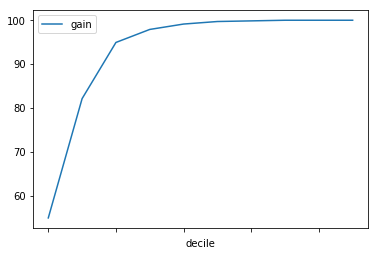

In [285]:
lift_df_loan_final.plot.line(x='decile', y=['gain'])

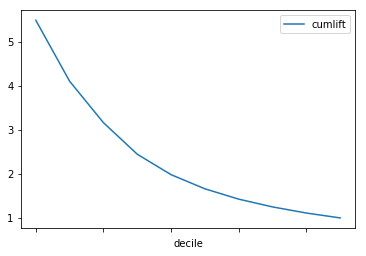

In [286]:
lift_df_loan_final.plot.line(x='decile', y=['cumlift'])